### Name: Adnan Amir
### Course: CS 5180

# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html
- ipywidgets and ipykernel if necessary
- Starter Code was tested on Python 3.11.5

In [37]:
import random
import numpy as np
import tqdm.notebook as tqdm
import matplotlib.pyplot as plt
import ipywidgets as widgets
from tqdm import tqdm


# 1: Complete the Implementation of the Four Rooms environment 

- The FourRooms is implemented as a python class. We explain the attributes and methods as follows
    - **init** function: Define all the attributes of the Four Rooms environment. For example, the state space, the action space, the start state, the goal state and so on.
    - **reset** function: Resets the agent to the start state (0, 0)
    - **step** function: Takes the current state and one action, returns the next state and a reward
   
- Please complete the implementation in the step function.

In [38]:
# FOUR ROOM ENVIRONMENT
class FourRooms(object):
    def __init__(self):
        # define the four room as a 2-D array for easy state space reference and visualization
        # 0 represents an empty cell; 1 represents a wall cell
        self.four_room_space = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
        
        # find the positions for all empty cells
        # not that: the origin for a 2-D numpy array is located at top-left while the origin for the FourRooms is at
        # the bottom-left. The following codes performs the re-projection.
        empty_cells = np.where(self.four_room_space == 0.0)
        self.state_space = [[col, 10 - row] for row, col in zip(empty_cells[0], empty_cells[1])]

        # define the action space
        self.action_space = {'LEFT': np.array([-1, 0]),
                             'RIGHT': np.array([1, 0]),
                             'DOWN': np.array([0, -1]),
                             'UP': np.array([0, 1])}
        
        # define the start state
        self.start_state = [0, 0]
        
        # define the goal state
        self.goal_state = [10, 10]
        

    def reset(self):
        """
        Reset the agent's state to the start state [0, 0]
        Return both the start state and reward
        """
        state = self.start_state  # reset the agent to [0, 0]
        reward = 0  # reward is 0
        return state, reward
        

    def step(self, state, act):
        """
        Args: 
            state: a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act: a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state: a list variable containing x, y integer coordinates (i.e., [1, 1])
            reward: an integer. it can be either 0 or 1.
        """
        
        # CODE HERE: implement the stochastic dynamics as described in Q1. 
        # Please note, we provide you with the deterministic transition function "take_action" below.
        # Therefore, you only have to implement the logics of the stochasticity.
        
        #Reset agent if already at goal state
        if state == self.goal_state:
            return self.reset()
        
        acts = []

        # Define possible actions
        if (act == "UP"):
            acts = ["UP", "LEFT", "RIGHT"]
        elif (act == "DOWN"):
            acts = ["DOWN", "LEFT", "RIGHT"]
        elif (act == "LEFT"):
            acts = ["LEFT", "UP", "DOWN"]
        elif (act == "RIGHT"):
            acts = ["RIGHT", "UP", "DOWN"]

        # Select first action with 80% chance and the other two with 10% chance
        action = random.choices(acts, weights=[0.8, 0.1, 0.1], k=1)[0]
        next_state = self.take_action(state, action)
        

        # CODE HERE: compute the reward based on the resulting state
        reward = 0 if next_state != self.goal_state else 1
        

        # return the current state, reward
        return next_state, reward
        

    """ DO NOT CHANGE BELOW """
    def take_action(self, state, act):
        """
        Input args: 
            state (list): a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act (string): a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state (list): a list variable containing x, y integer coordinates (i.e., [1, 1])
        """
        state = np.array(state)
        next_state = state + self.action_space[act]
        return next_state.tolist() if next_state.tolist() in self.state_space else state.tolist()

In [39]:
"""Here is the plot function you can use to generate the figure. DO NOT CHANGE"""
# PLOT FUNCTION
def plot_func(res_list):
    # set the figure size
    plt.figure(figsize=(8, 6))
    
    # plot each trial
    for re in res_list:
        plt.plot(list(range(len(res_list[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_reward = np.array(res_list).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list[0]))), mean_reward, linestyle="-", linewidth=2, color="k")

    # plot the figure
    plt.ylabel("Cumulative reward")
    plt.xlabel("Time step")
    plt.show()

# 2 Implement the manual policy

Use this to check your whether your implementation of the step function is correct.

In [40]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)

    # create the environment
    env = FourRooms()
    state, reward = env.reset()  # always call reset() before interaction
    
    # manual time step (YOU CAN CHANGE THIS TO ANY TIME STEP YOU WANT)
    time_step = 10


    # create a loop
    for t in range(time_step):
        
        #Flag to check if action is valid
        valid=True
        
        # prompt user for an action
        pick=input("Please type an action in all caps (UP,DOWN,LEFT,RIGHT):")
        
        # check if the action is valid
        if pick not in list(env.action_space.keys()):
            print("Invalid action. Choosing UP for this timestep.\n")
            valid=False
            continue
        
        # CODE HERE: implement your manual agent/policy function that takes in the action from the standard input
        action = "UP" if not valid else pick
        
        # CODE HERE: implement the code to interact with the Four Rooms environment above.
        # it should takes in the current state and action and returns the next_state and a reward
        # Hint: use the step function that you implement.
        next_state, reward = env.step(state,action)
        
        """DO NOT CHANGE BELOW"""
        # print interaction
        print(f"Step = {t}, state = {state}, action = {action}, next state = {next_state}, reward = {reward}")
        
        # reset if the agent reaches the goal
        if reward == 1:
            print("Reset the agent to the start state!")
            state, reward = env.reset()
        else:
            state = next_state

Step = 0, state = [0, 0], action = UP, next state = [1, 0], reward = 0
Step = 1, state = [1, 0], action = DOWN, next state = [1, 0], reward = 0
Step = 2, state = [1, 0], action = LEFT, next state = [0, 0], reward = 0
Step = 3, state = [0, 0], action = RIGHT, next state = [0, 0], reward = 0
Step = 4, state = [0, 0], action = UP, next state = [1, 0], reward = 0
Step = 5, state = [1, 0], action = DOWN, next state = [1, 0], reward = 0
Step = 6, state = [1, 0], action = LEFT, next state = [0, 0], reward = 0
Step = 7, state = [0, 0], action = RIGHT, next state = [1, 0], reward = 0
Step = 8, state = [1, 0], action = UP, next state = [1, 1], reward = 0
Step = 9, state = [1, 1], action = DOWN, next state = [1, 0], reward = 0


# 3 Implement a random policy

We provide the scaffolding code for running and plotting. Please implement a random policy

**Please note: you should read the code carefully before implementing to make sure the variable names are aligned.**

Run trial: 100%|██████████| 10/10 [00:00<00:00, 10.69it/s]


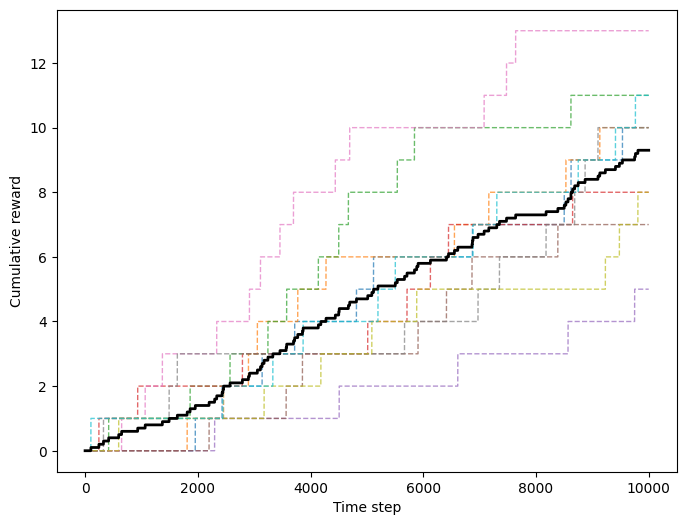

In [41]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_num = 10   
    # length of each trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list = []
    
    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: please implement a random policy to obtain an action.
            # it should return a random action from ["UP", "DOWN", "LEFT", "RIGHT"]
            action = np.random.choice(list(env.action_space.keys()))

                       
            # CODE HERE: please implement the code to get the next state and reward
            # it should takes in the current state and action
            # it should returns the next_state and reward
            next_state, reward = env.step(state,action)
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list)

# Q3 Written

The Random Policy is worse than the manual policy because it takes actions completely randomly, The manual policy relies on the user. So in theory, since we have knowledge of the map, we can get the optimal path since we know the correct action in each state. However, we can't do this for 1000s of time steps, so the random policy has that advantage of being automated.

As for the reason in difference, the manual policy has a 100% chance of taking the correct action (because we choose it) and the random policy has only 25% chance of choosing correctly

# 4 Implement better & worse policies against the Random Policy

# Q4 Written 
## Worse Policy

The worse policy gives higher weight to "DOWN" and "LEFT" actions (30% chance each) and lower weight to "UP" and "RIGHT" actions (20% chance each), this means that the agent is more likely to go opposite to where the goal is, resulting in fewer successful trials and therefore, worse performance than the random policy

Run trial: 100%|██████████| 10/10 [00:00<00:00, 22.93it/s]


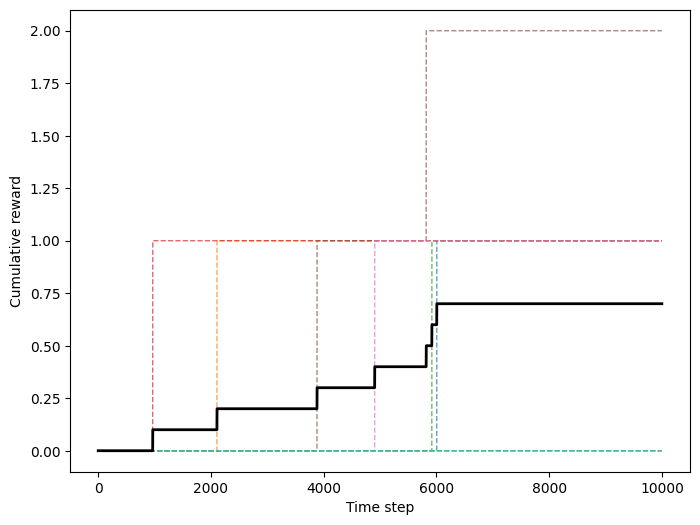

In [42]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail
    trial_num = 10   
    # length of each trail
    trial_length = int(1e4)
    
    # save the rewards for plot
    worse_rewards_list = []
    
    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: please implement a policy that is worse than the random policy.
            # It should takes in the current state and output an action
            #It is worse because it actively tries to go in the opposite direction from the goal (towards bottom left)
            action = random.choices(list(env.action_space.keys()),weights=[0.3,0.2,0.3,0.2],k=1)[0]
                       
            # CODE HERE: please implement the code to get the next state and reward
            next_state, reward = env.step(state,action)
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        worse_rewards_list.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(worse_rewards_list)

## Better Policy

Contrary to worse policy, the Better Policy gives higher weight to "UP" and "RIGHT" actions which generally heads towards the goal, resulting in more successful trials. The numbers are further apart (These same numbers reversed gave a 0 reward in all trials for the worse policy) at 40% chance each of taking the UP or RIGHT actions and 10% each for DOWN and LEFT actions

It is to be noted that these policies are based on me having the knowledge of the environment and spawn point. If this was to be implemented in an unknown environment (with knowledge of where the goal is) or in this environment but with random spawn loactions, a Heuristic policy is what I would have went with, moving towards the higher weighted cells for better policy and lower weighted cells for the worse policy.
The general approach is to move towards or away from the goal depending on better/worse policy

Run trial: 100%|██████████| 10/10 [00:00<00:00, 23.61it/s]


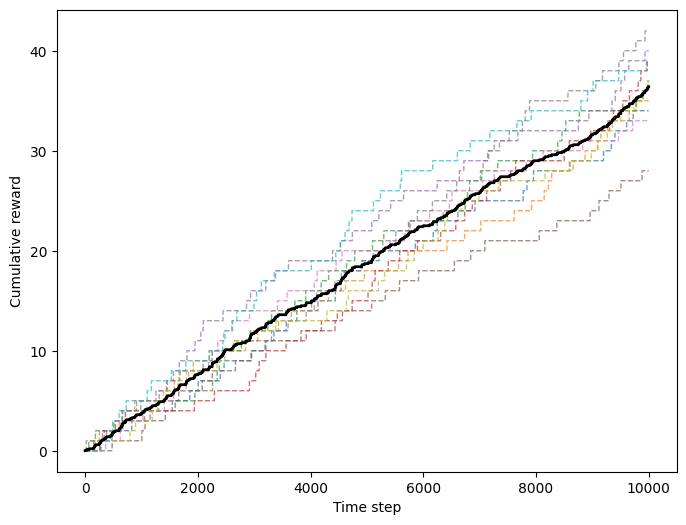

In [43]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail
    trial_num = 10   
    # length of each trail
    trial_length = int(1e4)
    
    # save the rewards for plot
    better_rewards_list = []
    
    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: please implement a policy that is worse than the random policy.
            # It should takes in the current state and output an action
            # It is better because it actively tries to go in the direction of the goal (towards top right)
            action = random.choices(list(env.action_space.keys()),weights=[0.1,0.4,0.1,0.4],k=1)[0]
                       
            # CODE HERE: please implement the code to get the next state and reward
            next_state, reward = env.step(state,action)
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        better_rewards_list.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(better_rewards_list)

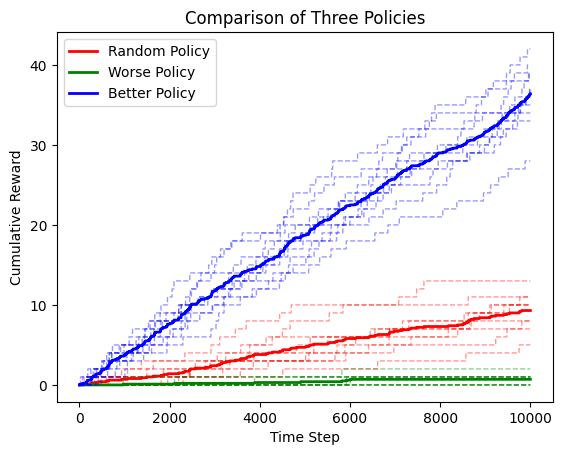

In [44]:
# Plot individual trials
for run in rewards_list:
    plt.plot(run, linestyle="--", linewidth=1, alpha=0.4, color="red")
# Plot the mean
reward1 = np.mean(rewards_list, axis=0)
plt.plot(reward1, linestyle="-", linewidth=2, color="red", label="Random Policy")

# Plot individual trials
for run in worse_rewards_list:
    plt.plot(run, linestyle="--", linewidth=1, alpha=0.4, color="green")
# Plot the mean
reward2 = np.mean(worse_rewards_list, axis=0)
plt.plot(reward2, linestyle="-", linewidth=2, color="green", label="Worse Policy")

# Plot individual trials
for run in better_rewards_list:
    plt.plot(run, linestyle="--", linewidth=1, alpha=0.4, color="blue")
# Plot the mean
reward3 = np.mean(better_rewards_list, axis=0)
plt.plot(reward3, linestyle="-", linewidth=2, color="blue", label="Better Policy")

plt.xlabel("Time Step")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.title("Comparison of Three Policies")
plt.show()
